In [21]:
import pandas as pd
import collections
import random
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('CEC_2.csv')
df = df.drop(columns=['Unnamed: 0'])

df_new = pd.DataFrame(columns=df.columns)
df_new

,adaptive_mutation_type,context_type,added_patterns_mutations,selection_type,elitism_type,regularization_type,genetic_scheme_type,num_nodes,desired_degree,desired_cl,actual_degree,actual_cl


In [40]:
df_new.to_csv('CEC_2.csv')

In [57]:
df = pd.read_csv('CEC_2.csv')
df=df.drop(columns='Unnamed: 0')
df = df[(df['desired_degree']!=20) & (df['num_nodes']==30)]
df.to_csv('CEC_new.csv')
#654+187


#duplicates = df.duplicated(subset=['num_nodes','desired_degree','desired_cl','adaptive_mutation_type'])

In [51]:
723/2

361.5

In [3]:
df_0 = df[(df['actual_cl']>0.14) & (df['actual_cl']<=0.16)]
df_1 = df[(df['actual_cl']>0.16) & (df['actual_cl']<=0.20)]
df_2 = df[(df['actual_cl']>0.20) & (df['actual_cl']<=0.21)]
df_3 = df[(df['actual_cl']>0.21) & (df['actual_cl']<=0.22)]
df_4 = df[(df['actual_cl']>0.22) & (df['actual_cl']<=0.23)]
df_5 = df[(df['actual_cl']>0.23) & (df['actual_cl']<=0.24)]

In [4]:
def rename_adaptive(x):
    if x=='bandit':
        return 1
    elif x=='context':
        return 2
    elif x=='default':
        return 3
def rename_selection(x):
    if x=='spea2':
        return 1
    elif x=='tournament':
        return 2
def rename_elitism(x):
    if x=='keep_n_best':
        return 1
    elif x=='none':
        return 2
    elif x=='replace_worst':
        return 3
def rename_regularization(x):
    if x=='decremental':
        return 1
    elif x=='none':
        return 2
def rename_genetic_scheme(x):
    if x=='generational':
        return 1
    elif x=='parameter_free':
        return 2
    elif x=='steady_state':
        return 3
    

In [11]:
list_0 = []
y_list=[]
for row in df_0.iterrows():
    app = [rename_adaptive(row[1]['adaptive_mutation_type']),
           int(row[1]['added_patterns_mutations']),
           rename_selection(row[1]['selection_type']),
           rename_elitism(row[1]['elitism_type']),
           rename_regularization(row[1]['regularization_type']),
           rename_genetic_scheme(row[1]['genetic_scheme_type'])]
    list_0.append(app)
    y_list.append(0)
for row in df_1.iterrows():
    app = [rename_adaptive(row[1]['adaptive_mutation_type']),
           int(row[1]['added_patterns_mutations']),
           rename_selection(row[1]['selection_type']),
           rename_elitism(row[1]['elitism_type']),
           rename_regularization(row[1]['regularization_type']),
           rename_genetic_scheme(row[1]['genetic_scheme_type'])]
    list_0.append(app)
    y_list.append(1)
for row in df_2.iterrows():
    app = [rename_adaptive(row[1]['adaptive_mutation_type']),
           int(row[1]['added_patterns_mutations']),
           rename_selection(row[1]['selection_type']),
           rename_elitism(row[1]['elitism_type']),
           rename_regularization(row[1]['regularization_type']),
           rename_genetic_scheme(row[1]['genetic_scheme_type'])]
    list_0.append(app)
    y_list.append(2)
for row in df_3.iterrows():
    app = [rename_adaptive(row[1]['adaptive_mutation_type']),
           int(row[1]['added_patterns_mutations']),
           rename_selection(row[1]['selection_type']),
           rename_elitism(row[1]['elitism_type']),
           rename_regularization(row[1]['regularization_type']),
           rename_genetic_scheme(row[1]['genetic_scheme_type'])]
    list_0.append(app)
    y_list.append(3)
for row in df_4.iterrows():
    app = [rename_adaptive(row[1]['adaptive_mutation_type']),
           int(row[1]['added_patterns_mutations']),
           rename_selection(row[1]['selection_type']),
           rename_elitism(row[1]['elitism_type']),
           rename_regularization(row[1]['regularization_type']),
           rename_genetic_scheme(row[1]['genetic_scheme_type'])]
    list_0.append(app)
    y_list.append(4)
for row in df_5.iterrows():
    app = [rename_adaptive(row[1]['adaptive_mutation_type']),
           int(row[1]['added_patterns_mutations']),
           rename_selection(row[1]['selection_type']),
           rename_elitism(row[1]['elitism_type']),
           rename_regularization(row[1]['regularization_type']),
           rename_genetic_scheme(row[1]['genetic_scheme_type'])]
    list_0.append(app)
    y_list.append(5)
X=np.array(list_0)
y = np.array(y_list)
print(X.shape, y.shape)


(211, 6) (211,)


In [15]:
from catboost import CatBoostClassifier, Pool

# initialize data
train_data = X

train_labels = y

test_data = catboost_pool = Pool(train_data, 
                                 train_labels)

model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='MultiClass',
                           verbose=True)
# train the model
model.fit(train_data, train_labels)
# make the prediction using the resulting model

feature_importance = model.feature_importances_


0:	learn: 0.5530954	total: 436us	remaining: 436us
1:	learn: 0.4562433	total: 805us	remaining: 0us


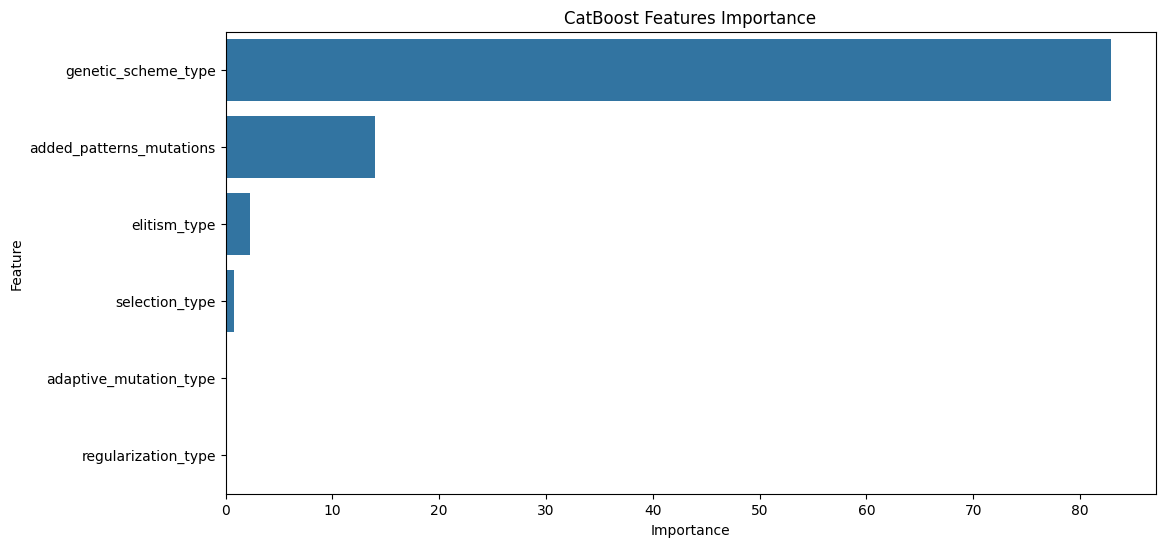

In [16]:
feature_importances = model.get_feature_importance()
# Assuming your dataset features are in a DataFrame `df`
feature_names = ['adaptive_mutation_type', 'added_patterns_mutations', 'selection_type','elitism_type','regularization_type','genetic_scheme_type']

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title('CatBoost Features Importance')
plt.show()


In [23]:
import collections

collections.Counter(df_0[df_0['genetic_scheme_type']=='parameter_free']['added_patterns_mutations'].tolist())

Counter({False: 36, True: 34})

In [58]:
collections.Counter(df_0['adaptive_mutation_type'].tolist())
#collections.Counter(df_5[df_5['genetic_scheme_type']=='generational']['added_patterns_mutations'].tolist())

Counter({'default': 48, 'bandit': 48, 'context': 45})

In [11]:
import pickle
import numpy as np
import pandas as pd


In [17]:
file = open('G_40_1.pickle', 'rb')
ini = pickle.load(file)

In [20]:
import pickle
pickle.__version__

AttributeError: module 'pickle' has no attribute '__version__'

In [35]:
G = pickle.load(open('G_40_8.pickle', 'rb'))
G.edges()

EdgeView([(0, 33), (0, 11), (0, 25), (0, 38), (0, 39), (0, 17), (0, 12), (0, 30), (0, 4), (0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 16), (0, 18), (0, 27), (0, 36), (1, 39), (1, 20), (1, 10), (1, 27), (1, 4), (1, 18), (1, 15), (1, 9), (1, 2), (1, 33), (1, 16), (1, 7), (1, 14), (1, 3), (1, 5), (1, 6), (1, 8), (1, 11), (1, 12), (1, 25), (1, 32), (2, 6), (2, 4), (2, 10), (2, 5), (2, 29), (2, 15), (2, 30), (2, 14), (2, 12), (2, 9), (2, 3), (2, 8), (2, 11), (2, 17), (2, 18), (2, 23), (2, 27), (2, 33), (2, 35), (2, 36), (2, 38), (3, 12), (3, 22), (3, 13), (3, 16), (3, 29), (3, 9), (3, 26), (3, 14), (3, 35), (3, 17), (3, 25), (3, 31), (3, 34), (3, 15), (3, 11), (3, 20), (3, 21), (3, 5), (3, 38), (3, 28), (3, 7), (3, 4), (3, 6), (3, 8), (3, 10), (3, 18), (3, 19), (3, 23), (3, 27), (3, 30), (3, 32), (4, 36), (4, 6), (4, 9), (4, 11), (4, 12), (4, 14), (4, 17), (4, 18), (4, 20), (4, 34), (4, 35), (5, 39), (5, 33), (5, 19), (5, 22), (5, 32), (5, 31), (5, 8), (5, 1

In [16]:
for i in range(1,6):
    with open('G_40_'+str(i)+'.pickle', 'rb') as f:
        G = pickle.load(f)
    print(G.edges())

[(0, 24), (0, 30), (0, 3), (0, 11), (0, 35), (0, 1), (0, 2), (0, 8), (0, 13), (0, 19), (0, 21), (0, 27), (0, 29), (0, 31), (0, 32), (0, 33), (0, 34), (0, 36), (0, 39), (1, 15), (1, 38), (1, 17), (1, 7), (1, 23), (1, 30), (1, 16), (1, 5), (1, 9), (1, 12), (1, 14), (1, 22), (1, 25), (1, 28), (1, 36), (1, 37), (2, 7), (2, 25), (2, 14), (2, 8), (2, 11), (2, 17), (2, 38), (2, 15), (2, 37), (2, 30), (2, 18), (2, 4), (2, 9), (2, 12), (2, 16), (2, 22), (2, 23), (2, 28), (2, 29), (2, 32), (2, 39), (3, 29), (3, 37), (3, 9), (3, 27), (3, 14), (3, 34), (3, 10), (3, 39), (3, 28), (3, 38), (3, 7), (3, 8), (3, 11), (3, 12), (3, 17), (3, 22), (3, 23), (3, 30), (4, 32), (4, 29), (4, 23), (4, 37), (4, 36), (4, 28), (4, 19), (4, 10), (4, 11), (4, 30), (4, 25), (4, 18), (4, 5), (4, 8), (4, 13), (4, 14), (4, 15), (4, 21), (4, 24), (4, 26), (4, 31), (4, 35), (5, 24), (5, 20), (5, 37), (5, 26), (5, 34), (5, 18), (5, 14), (5, 33), (5, 39), (5, 8), (5, 29), (5, 13), (5, 11), (5, 12), (5, 15), (5, 21), (5, 30),

In [28]:
for i in range(1,6):
    with open('G_40_'+str(i)+'.pickle', 'rb') as f:
        G = pickle.load(f)
    G.edges()
    edges = G.edges()

    # Open (or create) a CSV file and write the list into it
    with open('G_40_'+str(i) + '.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        print(list(edges))
        writer.writerows(list(edges))
    #    with open('G_40_'+str(i) + '.pickle','a') as f:
     #       print(edge[0], edge[1])
    #np.save('40_'+str(i)+'_edges.npy', arr)

[(0, 24), (0, 30), (0, 3), (0, 11), (0, 35), (0, 1), (0, 2), (0, 8), (0, 13), (0, 19), (0, 21), (0, 27), (0, 29), (0, 31), (0, 32), (0, 33), (0, 34), (0, 36), (0, 39), (1, 15), (1, 38), (1, 17), (1, 7), (1, 23), (1, 30), (1, 16), (1, 5), (1, 9), (1, 12), (1, 14), (1, 22), (1, 25), (1, 28), (1, 36), (1, 37), (2, 7), (2, 25), (2, 14), (2, 8), (2, 11), (2, 17), (2, 38), (2, 15), (2, 37), (2, 30), (2, 18), (2, 4), (2, 9), (2, 12), (2, 16), (2, 22), (2, 23), (2, 28), (2, 29), (2, 32), (2, 39), (3, 29), (3, 37), (3, 9), (3, 27), (3, 14), (3, 34), (3, 10), (3, 39), (3, 28), (3, 38), (3, 7), (3, 8), (3, 11), (3, 12), (3, 17), (3, 22), (3, 23), (3, 30), (4, 32), (4, 29), (4, 23), (4, 37), (4, 36), (4, 28), (4, 19), (4, 10), (4, 11), (4, 30), (4, 25), (4, 18), (4, 5), (4, 8), (4, 13), (4, 14), (4, 15), (4, 21), (4, 24), (4, 26), (4, 31), (4, 35), (5, 24), (5, 20), (5, 37), (5, 26), (5, 34), (5, 18), (5, 14), (5, 33), (5, 39), (5, 8), (5, 29), (5, 13), (5, 11), (5, 12), (5, 15), (5, 21), (5, 30),

In [13]:
np.load('40_1_edges.npy', allow_pickle=True)

array([[0, 24],
       [0, 30],
       [0, 3],
       [0, 11],
       [0, 35],
       [0, 1],
       [0, 2],
       [0, 8],
       [0, 13],
       [0, 19],
       [0, 21],
       [0, 27],
       [0, 29],
       [0, 31],
       [0, 32],
       [0, 33],
       [0, 34],
       [0, 36],
       [0, 39],
       [1, 15],
       [1, 38],
       [1, 17],
       [1, 7],
       [1, 23],
       [1, 30],
       [1, 16],
       [1, 5],
       [1, 9],
       [1, 12],
       [1, 14],
       [1, 22],
       [1, 25],
       [1, 28],
       [1, 36],
       [1, 37],
       [2, 7],
       [2, 25],
       [2, 14],
       [2, 8],
       [2, 11],
       [2, 17],
       [2, 38],
       [2, 15],
       [2, 37],
       [2, 30],
       [2, 18],
       [2, 4],
       [2, 9],
       [2, 12],
       [2, 16],
       [2, 22],
       [2, 23],
       [2, 28],
       [2, 29],
       [2, 32],
       [2, 39],
       [3, 29],
       [3, 37],
       [3, 9],
       [3, 27],
       [3, 14],
       [3, 34],
       [3, 10],
    

In [6]:
import networkx as nx
for i in range(5):
    G = nx.generators.erdos_renyi_graph(40,0.2)
    print(nx.average_clustering(G))

0.18029761904761904
0.1974046786546787
0.1768506493506494
0.17345689033189035
0.1853994616494617


In [2]:
df = pd.read_csv('results.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df

,dense,star,cycle,path,num edges,num nodes,avg degree,des cl,fact deg,fact cl,time
0,False,False,False,False,5,20,5,0.21,5.0,0.2102,0.11
1,True,False,False,False,5,20,5,0.21,5.0,0.2090,0.14
2,False,True,False,False,5,20,5,0.21,5.0,0.2105,0.15
3,True,True,False,False,5,20,5,0.21,5.0,0.2036,1.03
4,False,False,False,True,5,20,5,0.21,5.0,0.2098,0.08
...,...,...,...,...,...,...,...,...,...,...,...
732,False,False,False,False,10,40,10,0.43,10.0,0.4298,0.47
733,False,False,False,False,15,40,10,0.43,10.0,0.4306,0.49
734,False,False,False,False,20,40,10,0.43,10.0,0.4298,0.66
735,False,False,False,False,5,40,10,0.43,10.0,0.4300,0.73


In [42]:
df_one_configuration =  df[(df['num nodes']==20) & (df['num edges']==5) &(df['avg degree'] == 5) & (df['des cl'] == 0.46)].copy()
df_one_configuration['diff'] = df_one_configuration['fact cl'].apply(lambda x: np.abs(x-0.21))
pd.set_option('display.max_rows', df_one_configuration.shape[0]+1)
print(df_one_configuration)#.plot.line(y='diff')

Empty DataFrame
Columns: [dense, star, cycle, path, num edges, num nodes, avg degree, des cl, fact deg, fact cl, time, diff]
Index: []


In [28]:
#wide_df = px.data.medals_wide()
fig = px.bar(df_one_configuration, x="des cl", y=["gold", "silver", "bronze"], title="avg deg=5")
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 3, whereas the length of  previously-processed arguments ['des cl'] is 10

In [92]:
df_one_configuration.groupby(['des cl','num edges']).mean()

dense  star  cycle  path  num nodes  avg degree  fact deg  \
des cl num edges                                                              
0.47   5            0.0   0.0    0.0   0.0       20.0        10.0      10.0   
       10           0.0   0.0    0.0   0.0       20.0        10.0      10.0   
0.52   5            0.0   0.0    0.0   0.0       20.0        10.0      10.0   
       10           0.0   0.0    0.0   0.0       20.0        10.0      10.0   
0.57   5            0.0   0.0    0.0   0.0       20.0        10.0      10.0   

                  fact cl  time  
des cl num edges                 
0.47   5           0.4709  0.24  
       10          0.4704  0.23  
0.52   5           0.5197  0.10  
       10          0.5206  0.10  
0.57   5           0.5705  0.16